# IMPORTING DATA

We will try to import data from datasets csv files now and try to make a Dataframe

In [2]:
#Importing pandas to make dataframe and accomodate CSV file
import pandas as pd

trade_names=pd.read_csv("Trade_Name.csv")

#Removing unneccesary columns
trade_names = trade_names[['trade_name_serial', 'trade_name_en', 'license_number', 'issue_date', 'expiry_date', 'cancel_date']]

#Lets see our new dataframe
trade_names

,trade_name_serial,trade_name_en,license_number,issue_date,expiry_date,cancel_date
0,1002415,CORAL BOUTIQUE VILLAS - AL BARSHA - DUBAI,583207,01/07/2006,30/06/2024,NaN
1,1002862,SAID FARID GENERAL TRADING (L.L.C),583617,12/07/2006,11/07/2024,NaN
2,1002950,DAMAC PROPERTIES CO (L.L.C),247136,18/06/1997,17/06/2024,NaN
3,1003020,CONSORTIO INTERNATIONAL ENGINEERING CONSULTANT...,585878,13/09/2006,12/09/2024,NaN
4,100348,BUTTON HOUSE TRADING CO. (L.L.C),501225,15/09/1997,14/09/2024,NaN
...,...,...,...,...,...,...
755427,2886630,ARCH VIBE PARTIES & ENTERTAINMENTS SERVICES,1150299,08/02/2023,07/02/2024,NaN
755428,2887630,GREEN HOME CARE TECHNICAL SERVICES L.L.C,1150675,10/02/2023,09/02/2024,NaN
755429,2888230,QARI ABDUL MAJEED PROJECT MANAGEMENT SERVICES ...,1150872,09/02/2023,08/02/2024,NaN
755430,2888430,KOWKAB ALMERRIKH PROJECT MANAGEMENT SERVICES CO.,1151247,10/02/2023,09/02/2024,NaN


In [3]:
#Importing License Master file

license_master = pd.read_csv("License_Master.csv")

#Slicing it for relevant info only
license_master = license_master[['license_number', 'trade_name_serial_number', 'license_category_code', 'license_category_desc_en' ]]

license_master

,license_number,trade_name_serial_number,license_category_code,license_category_desc_en
0,1000037,3099270,2.0,Commercial
1,1000444,2521842,2.0,Commercial
2,1000645,2595048,1.0,Professional
3,1001004,2592828,2.0,Commercial
4,1001063,2595969,2.0,Commercial
...,...,...,...,...
714161,1174230,2963133,1.0,Professional
714162,1174430,2962974,1.0,Professional
714163,1174630,2897424,2.0,Commercial
714164,1174830,2965133,1.0,Professional


In [4]:
#consolidating data to get number of licenses, group wise

licenses_groups=license_master.groupby("license_category_desc_en").agg({'license_number':'count'})

licenses_groups.columns = ["#licenses"]

In [5]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
#fig, ax = plt.subplots()
##ax.bar(licenses_groups.index, licenses_groups['#licenses'], width=0.2)
#ax.set_xlabel("types of licenses")
#ax.set_ylabel("number")
#plt.title("Visual representation of types of licenses")
#plt.show()
licenses_groups

,#licenses
license_category_desc_en,
Commercial,438711
Industrial,7785
Professional,266136
Tourism,1515


In [6]:
#Import types of business activities associated with the licenses

activities = pd.read_csv("License_Activities.csv")
activities = activities[["activity_code", "activity_desc_en", "license_number"]]
activities

,activity_code,activity_desc_en,license_number
0,11202,"Growing of Trees Seedling, Ornamental Plants &...",1096243
1,11202,"Growing of Trees Seedling, Ornamental Plants &...",240667
2,11202,"Growing of Trees Seedling, Ornamental Plants &...",610185
3,11202,"Growing of Trees Seedling, Ornamental Plants &...",815335
4,11202,"Growing of Trees Seedling, Ornamental Plants &...",126503
...,...,...,...
2567188,454015,Electrical Fittings & Fixtures Repairing & Mai...,1186230
2567189,741302,Marketing Management,1186630
2567190,222204,Design & Artwork Services,1186830
2567191,722909,Marketing Services Via Social Media,1187030


In [7]:
#There are toooo many unique activity descriptions in this dataframe, there must be another file to categorize these further through the activity

activity_categories = pd.read_csv('Business_Activities.csv')
activity_categories = activity_categories[["activity_code", "activity_name_en", "activity_category_en"]]
activity_categories['activity_code'] = activity_categories['activity_code'].astype(str)
activity_categories

,activity_code,activity_name_en,activity_category_en
0,011100,Growing of Cereals & Crops,Agriculture
1,011201,Growing of Vegetables,Agriculture
2,011202,"Growing of Trees Seedling, Ornamental Plants &...",Agriculture
3,011301,Growing of Fruit & Palm Trees,Agriculture
4,012101,Farming of cows,Agriculture
...,...,...,...
2866,851927,Medical Spa (MedSpa) Center,ط®ط¯ظ…ط§ط￾ ظ…ط¬ط￾ظ…ط¹ظط© ظˆ ط´ط®طµظط©
2867,100085,Military Heavy Weapons Manufacturing,Manufacturing
2868,100089,War Ammunition Manufacturing,Manufacturing
2869,100090,Military Weapons Spare Parts Manufacturing,Manufacturing


In [8]:
# Lets work on joining all data together into one table
# First we join the name table with licenses master
name_license = trade_names.merge(license_master, on='license_number', how='left')
name_license


,trade_name_serial,trade_name_en,license_number,issue_date,expiry_date,cancel_date,trade_name_serial_number,license_category_code,license_category_desc_en
0,1002415,CORAL BOUTIQUE VILLAS - AL BARSHA - DUBAI,583207,01/07/2006,30/06/2024,NaN,1002415,1.0,Professional
1,1002862,SAID FARID GENERAL TRADING (L.L.C),583617,12/07/2006,11/07/2024,NaN,1002862,2.0,Commercial
2,1002950,DAMAC PROPERTIES CO (L.L.C),247136,18/06/1997,17/06/2024,NaN,1002950,2.0,Commercial
3,1003020,CONSORTIO INTERNATIONAL ENGINEERING CONSULTANT...,585878,13/09/2006,12/09/2024,NaN,1003020,2.0,Commercial
4,100348,BUTTON HOUSE TRADING CO. (L.L.C),501225,15/09/1997,14/09/2024,NaN,100348,2.0,Commercial
...,...,...,...,...,...,...,...,...,...
755427,2886630,ARCH VIBE PARTIES & ENTERTAINMENTS SERVICES,1150299,08/02/2023,07/02/2024,NaN,2886630,1.0,Professional
755428,2887630,GREEN HOME CARE TECHNICAL SERVICES L.L.C,1150675,10/02/2023,09/02/2024,NaN,2887630,2.0,Commercial
755429,2888230,QARI ABDUL MAJEED PROJECT MANAGEMENT SERVICES ...,1150872,09/02/2023,08/02/2024,NaN,2888230,1.0,Professional
755430,2888430,KOWKAB ALMERRIKH PROJECT MANAGEMENT SERVICES CO.,1151247,10/02/2023,09/02/2024,NaN,2888430,1.0,Professional


In [9]:
#Now we join other tables one by one
name_license_activity = name_license.merge(activities, on=['license_number'], how='inner')
name_license_activity['activity_code'] = name_license_activity['activity_code'].astype(str)
name_license_activity

,trade_name_serial,trade_name_en,license_number,issue_date,expiry_date,cancel_date,trade_name_serial_number,license_category_code,license_category_desc_en,activity_code,activity_desc_en
0,1002415,CORAL BOUTIQUE VILLAS - AL BARSHA - DUBAI,583207,01/07/2006,30/06/2024,NaN,1002415,1.0,Professional,701006,Hotel Appartments Rental
1,1002862,SAID FARID GENERAL TRADING (L.L.C),583617,12/07/2006,11/07/2024,NaN,1002862,2.0,Commercial,521904,General Trading
2,1002950,DAMAC PROPERTIES CO (L.L.C),247136,18/06/1997,17/06/2024,NaN,1002950,2.0,Commercial,659908,Real Estate Development
3,1002950,DAMAC PROPERTIES CO (L.L.C),247136,18/06/1997,17/06/2024,NaN,1002950,2.0,Commercial,701001,Buying and selling of real estate
4,1002950,DAMAC PROPERTIES CO (L.L.C),247136,18/06/1997,17/06/2024,NaN,1002950,2.0,Commercial,701003,Leasing and Management of other people's property
...,...,...,...,...,...,...,...,...,...,...,...
2825037,2891830,NOOR ALFAJR TECHNICAL SERVICES TECHNICAL SERVI...,1152292,13/02/2023,12/02/2024,NaN,2891830,1.0,Professional,454003,Floor & Wall Tiling Works
2825038,2891830,NOOR ALFAJR TECHNICAL SERVICES TECHNICAL SERVI...,1152292,13/02/2023,12/02/2024,NaN,2891830,1.0,Professional,454004,Painting Contracting
2825039,2891830,NOOR ALFAJR TECHNICAL SERVICES TECHNICAL SERVI...,1152292,13/02/2023,12/02/2024,NaN,2891830,1.0,Professional,454005,Carpentry & wood Flooring Works
2825040,2891830,NOOR ALFAJR TECHNICAL SERVICES TECHNICAL SERVI...,1152292,13/02/2023,12/02/2024,NaN,2891830,1.0,Professional,454011,Wallpaper Fixing Works


In [10]:
name_license_activity_categorized = name_license_activity.merge(activity_categories, on='activity_code', how='left')
name_license_activity_categorized

,trade_name_serial,trade_name_en,license_number,issue_date,expiry_date,cancel_date,trade_name_serial_number,license_category_code,license_category_desc_en,activity_code,activity_desc_en,activity_name_en,activity_category_en
0,1002415,CORAL BOUTIQUE VILLAS - AL BARSHA - DUBAI,583207,01/07/2006,30/06/2024,NaN,1002415,1.0,Professional,701006,Hotel Appartments Rental,Hotel Appartments Rental,"Real Estate,Renting,Bus Servic"
1,1002862,SAID FARID GENERAL TRADING (L.L.C),583617,12/07/2006,11/07/2024,NaN,1002862,2.0,Commercial,521904,General Trading,General Trading,Trading & Services
2,1002950,DAMAC PROPERTIES CO (L.L.C),247136,18/06/1997,17/06/2024,NaN,1002950,2.0,Commercial,659908,Real Estate Development,Real Estate Development,Classification Service
3,1002950,DAMAC PROPERTIES CO (L.L.C),247136,18/06/1997,17/06/2024,NaN,1002950,2.0,Commercial,701001,Buying and selling of real estate,Buying and selling of real estate,"Real Estate,Renting,Bus Servic"
4,1002950,DAMAC PROPERTIES CO (L.L.C),247136,18/06/1997,17/06/2024,NaN,1002950,2.0,Commercial,701003,Leasing and Management of other people's property,Leasing and Management of other people's property,"Real Estate,Renting,Bus Servic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044257,2891830,NOOR ALFAJR TECHNICAL SERVICES TECHNICAL SERVI...,1152292,13/02/2023,12/02/2024,NaN,2891830,1.0,Professional,454003,Floor & Wall Tiling Works,Floor & Wall Tiling Works,Construction
3044258,2891830,NOOR ALFAJR TECHNICAL SERVICES TECHNICAL SERVI...,1152292,13/02/2023,12/02/2024,NaN,2891830,1.0,Professional,454004,Painting Contracting,Painting Contracting,Construction
3044259,2891830,NOOR ALFAJR TECHNICAL SERVICES TECHNICAL SERVI...,1152292,13/02/2023,12/02/2024,NaN,2891830,1.0,Professional,454005,Carpentry & wood Flooring Works,Carpentry & wood Flooring Works,Construction
3044260,2891830,NOOR ALFAJR TECHNICAL SERVICES TECHNICAL SERVI...,1152292,13/02/2023,12/02/2024,NaN,2891830,1.0,Professional,454011,Wallpaper Fixing Works,Wallpaper Fixing Works,Construction


In [11]:
#Further removing extra columns to make data look better
name_license_activity_categorized = name_license_activity_categorized.drop(columns = ['trade_name_serial_number', 'license_category_code', 'activity_desc_en'])
name_license_activity_categorized

,trade_name_serial,trade_name_en,license_number,issue_date,expiry_date,cancel_date,license_category_desc_en,activity_code,activity_name_en,activity_category_en
0,1002415,CORAL BOUTIQUE VILLAS - AL BARSHA - DUBAI,583207,01/07/2006,30/06/2024,NaN,Professional,701006,Hotel Appartments Rental,"Real Estate,Renting,Bus Servic"
1,1002862,SAID FARID GENERAL TRADING (L.L.C),583617,12/07/2006,11/07/2024,NaN,Commercial,521904,General Trading,Trading & Services
2,1002950,DAMAC PROPERTIES CO (L.L.C),247136,18/06/1997,17/06/2024,NaN,Commercial,659908,Real Estate Development,Classification Service
3,1002950,DAMAC PROPERTIES CO (L.L.C),247136,18/06/1997,17/06/2024,NaN,Commercial,701001,Buying and selling of real estate,"Real Estate,Renting,Bus Servic"
4,1002950,DAMAC PROPERTIES CO (L.L.C),247136,18/06/1997,17/06/2024,NaN,Commercial,701003,Leasing and Management of other people's property,"Real Estate,Renting,Bus Servic"
...,...,...,...,...,...,...,...,...,...,...
3044257,2891830,NOOR ALFAJR TECHNICAL SERVICES TECHNICAL SERVI...,1152292,13/02/2023,12/02/2024,NaN,Professional,454003,Floor & Wall Tiling Works,Construction
3044258,2891830,NOOR ALFAJR TECHNICAL SERVICES TECHNICAL SERVI...,1152292,13/02/2023,12/02/2024,NaN,Professional,454004,Painting Contracting,Construction
3044259,2891830,NOOR ALFAJR TECHNICAL SERVICES TECHNICAL SERVI...,1152292,13/02/2023,12/02/2024,NaN,Professional,454005,Carpentry & wood Flooring Works,Construction
3044260,2891830,NOOR ALFAJR TECHNICAL SERVICES TECHNICAL SERVI...,1152292,13/02/2023,12/02/2024,NaN,Professional,454011,Wallpaper Fixing Works,Construction


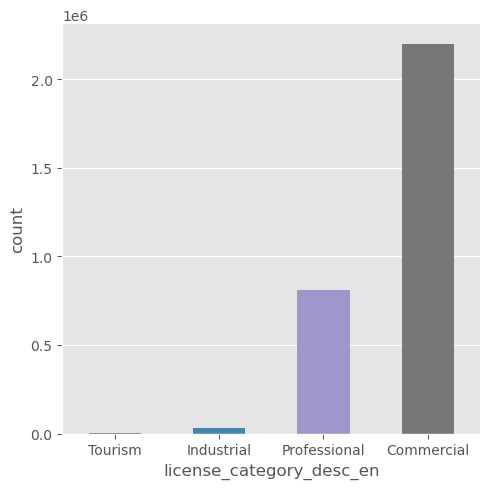

,#licenses
license_category_desc_en,
Commercial,438711
Industrial,7785
Professional,266136
Tourism,1515


In [12]:
# Visualizing Data to understand whats in trend, study patterns on the business registered by DED.

import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="license_category_desc_en", data=name_license_activity_categorized, kind="count", order=['Tourism', 'Industrial', 'Professional', 'Commercial'], width=0.5)
sns.set
plt.show()
licenses_groups

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 16
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   activity_category_en  26 non-null     object
 1   unique_license_count  26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


C:\Users\dania\AppData\Local\Temp\ipykernel_4916\3291459702.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  activity_wise_unique_sorted_consolidated = activity_wise_unique_sorted_nogarbage.append(other_row, ignore_index=True)


<Figure size 1500x800 with 0 Axes>

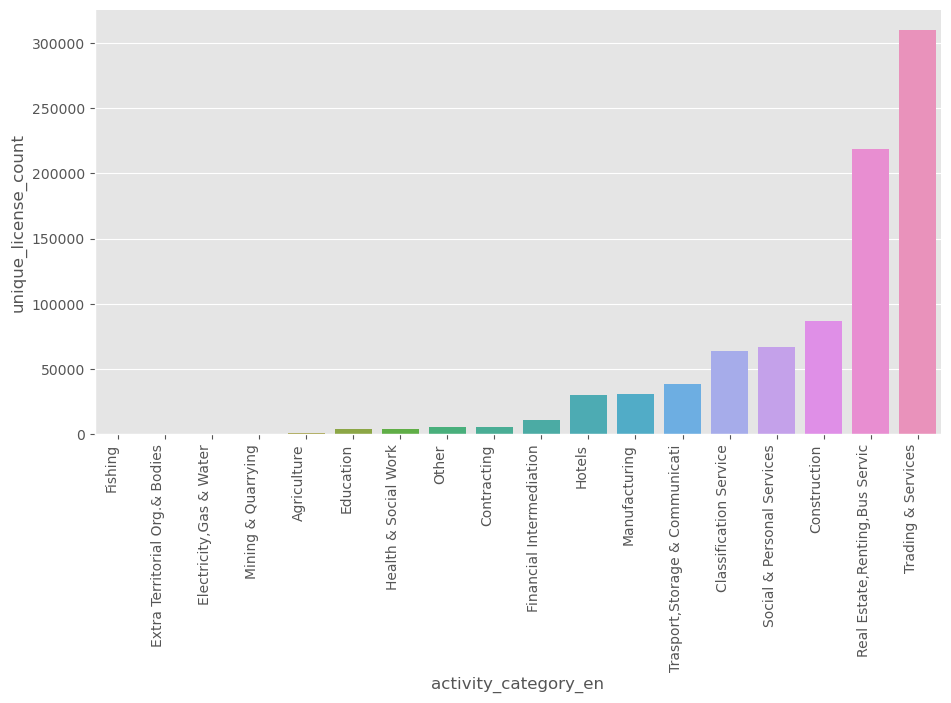

,activity_category_en,unique_license_count
8,Fishing,4
6,Extra Territorial Org.& Bodies,7
5,"Electricity,Gas & Water",203
12,Mining & Quarrying,426
0,Agriculture,501
4,Education,4051
9,Health & Social Work,4273
17,Other,5197
3,Contracting,5646
7,Financial Intermediation,10921


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt



activity_wise = name_license_activity_categorized.groupby("activity_category_en").agg({"license_number":"count"})

activity_wise_unique = name_license_activity_categorized.groupby("activity_category_en")["license_number"].nunique().reset_index()
activity_wise_unique.columns = ["activity_category_en", "unique_license_count"]
activity_wise_unique = activity_wise_unique.sort_values("unique_license_count", ascending=True)
activity_wise_unique.info()
activity_wise_unique_sorted = activity_wise_unique.sort_values(by = ['activity_category_en'], ascending=True)
excluded_indices = [0] + list(range(18, 26))
activity_wise_unique_sorted_nogarbage = activity_wise_unique_sorted.drop(excluded_indices)
consolidated_total = activity_wise_unique_sorted.loc[excluded_indices, 'unique_license_count'].sum()
other_row = pd.DataFrame({'activity_category_en': ['Other'], 'unique_license_count': [consolidated_total]})
activity_wise_unique_sorted_consolidated = activity_wise_unique_sorted_nogarbage.append(other_row, ignore_index=True)
activity_wise_unique_sorted_consolidated = activity_wise_unique_sorted_consolidated.sort_values("unique_license_count", ascending=True)
# Increase figure size
plt.figure(figsize=(15, 8))  # Adjust the width and height as needed

# Create the catplot
g = sns.catplot(x="activity_category_en", y='unique_license_count', data=activity_wise_unique_sorted_consolidated, kind='bar', aspect=2)

# Rotate x-axis tick labels
g.set_xticklabels(rotation=90, horizontalalignment='right')

# Show the plot
plt.show()
activity_wise_unique_sorted_consolidated

In [67]:

activity_wise_unique_sorted_consolidated


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 16
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   activity_category_en  26 non-null     object
 1   unique_license_count  26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


C:\Users\dania\AppData\Local\Temp\ipykernel_4916\1663370882.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  activity_wise_unique_sorted_consolidated = activity_wise_unique_sorted_nogarbage.append(other_row, ignore_index=True)


,activity_category_en,unique_license_count
0,Agriculture,501
1,Classification Service,63902
2,Construction,86834
3,Contracting,5646
4,Education,4051
5,"Electricity,Gas & Water",203
6,Extra Territorial Org.& Bodies,7
7,Financial Intermediation,10921
8,Fishing,4
9,Health & Social Work,4273


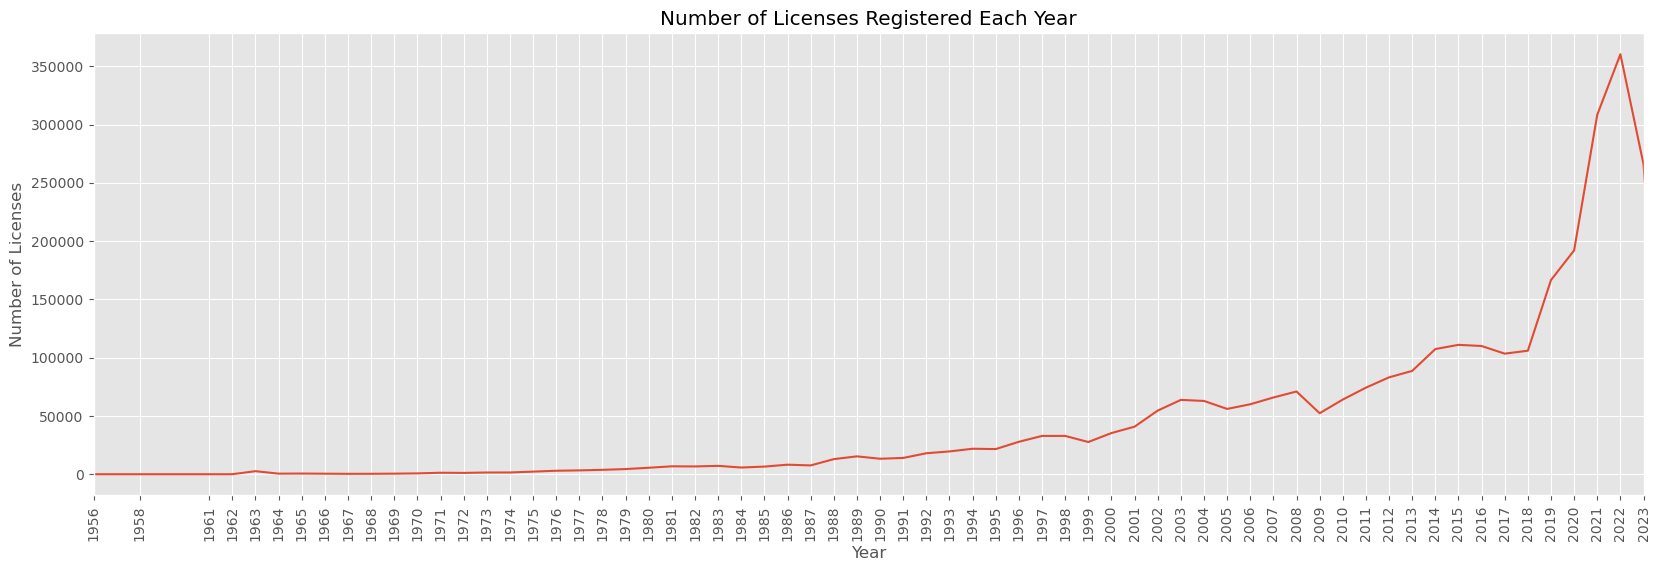

,issue_year,license_number
0,1956,1
1,1958,5
2,1961,3
3,1962,9
4,1963,2626
...,...,...
61,2020,192098
62,2021,308450
63,2022,360395
64,2023,265928


In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Convert the "issue_date" column to a pandas datetime object
name_license_activity_categorized['issue_date'] = pd.to_datetime(name_license_activity_categorized['issue_date'], format='%d/%m/%Y')

# Extract the year from the "issue_date" column and create a new "issue_year" column
name_license_activity_categorized['issue_year'] = name_license_activity_categorized['issue_date'].dt.year

# Group by the "issue_year" column and count the number of licenses for each year
licenses_by_year = name_license_activity_categorized.groupby('issue_year')['license_number'].count().reset_index()

# Create the line plot
plt.figure(figsize=(20, 6))
sns.lineplot(x='issue_year', y='license_number', data=licenses_by_year)

# Set x-tick labels for each year
plt.xticks(licenses_by_year['issue_year'], rotation=90)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Licenses')
plt.title('Number of Licenses Registered Each Year')
plt.xlim(licenses_by_year['issue_year'].min(), 2023)

# Show the plot
plt.show()

name_license_activity_categorized
licenses_by_year

In [165]:
# Sort the DataFrame by "issue_date"
name_license_activity_categorized_cleaned.sort_values(by='issue_date', inplace=True)

# Split the sorted DataFrame into three equal parts
num_parts = 3
split_data = np.array_split(name_license_activity_categorized_cleaned, num_parts)

# Export each part to Excel
for i, part in enumerate(split_data):
    part.to_excel(f'part_{i + 1}.xlsx', index=False)
